In [1]:
from model import StrategicDLinear, DLinear, util, layer
from data import SlidingWinDataset

import os

import torch
from torch import optim, nn
from torch.utils.data import DataLoader

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model_save_dirs = ['../log/' + i for i in os.listdir('../log')]
model_save_dirs

['../log/DLinear-Strategy(norm,SMA,win=10,batch_size=4,valid_size=70)',
 '../log/DLinear-Strategy-E(norm,SMA,win=10,batch_size=4,valid_size=70)',
 '../log/DLinear-T(norm,SMA,win=10,batch_size=4,valid_size=70)',
 '../log/DLinear-T_Strategy(norm,SMA,win=10,batch_size=4,valid_size=70)']

In [10]:
counter_nums = [9012, 9003, 9049, 9025, 9053, 9077, 9207, 9164, 9008, 9039, 9200, 9472, 9490]

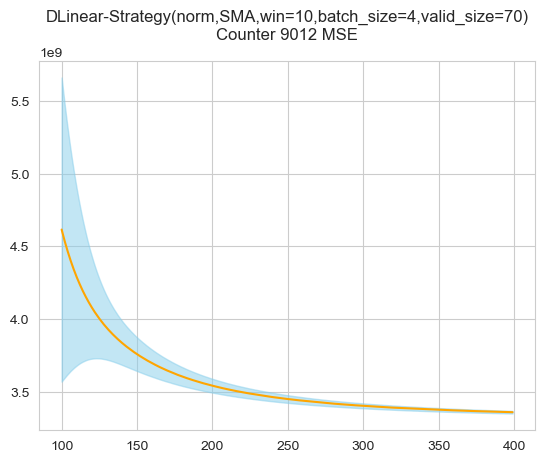

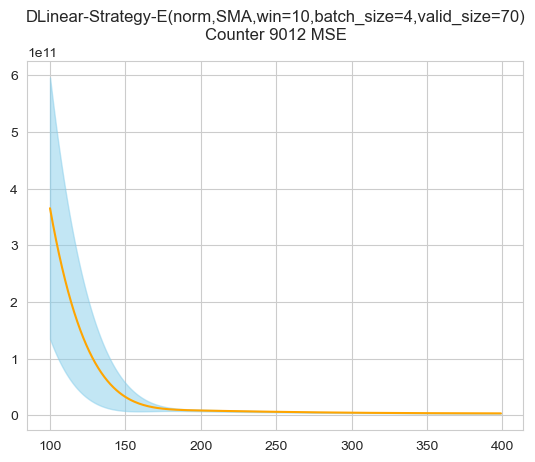

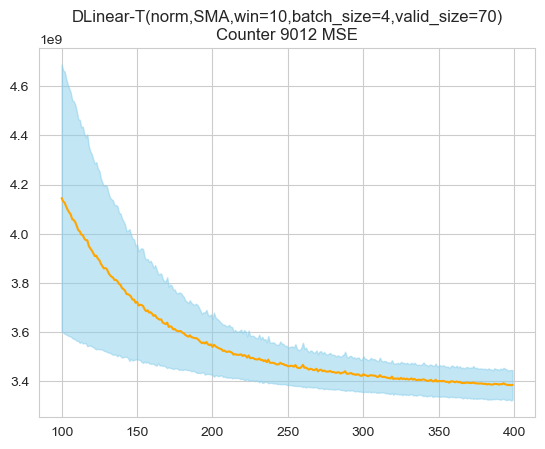

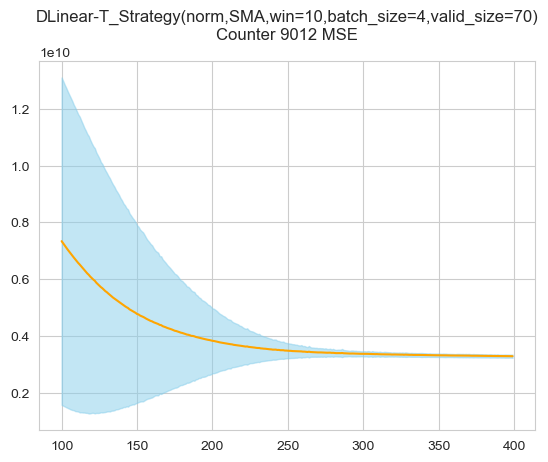

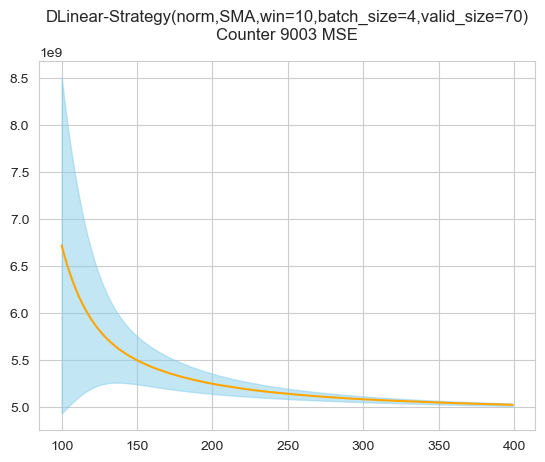

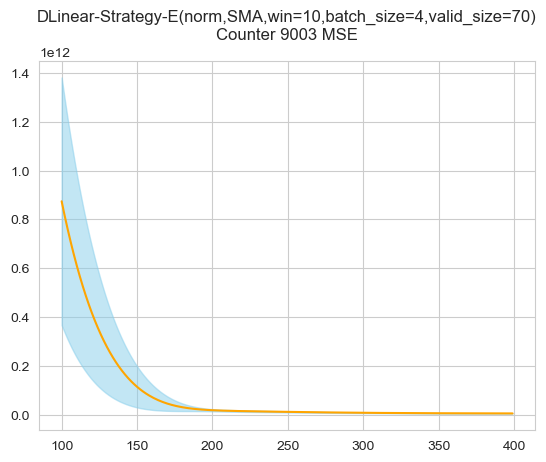

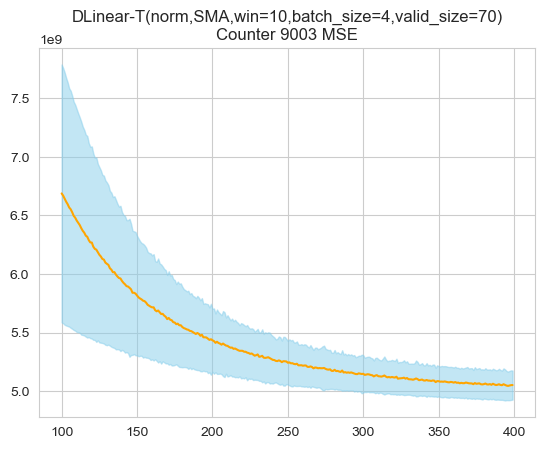

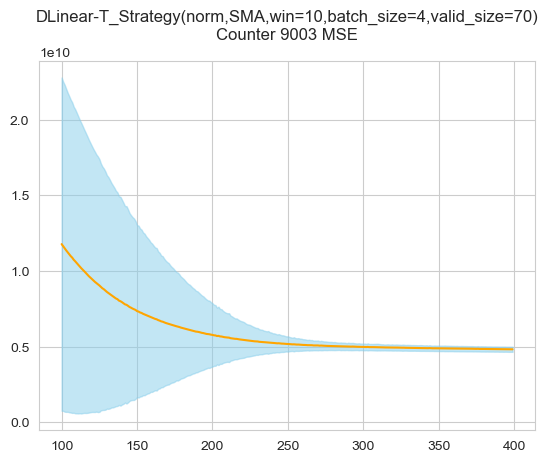

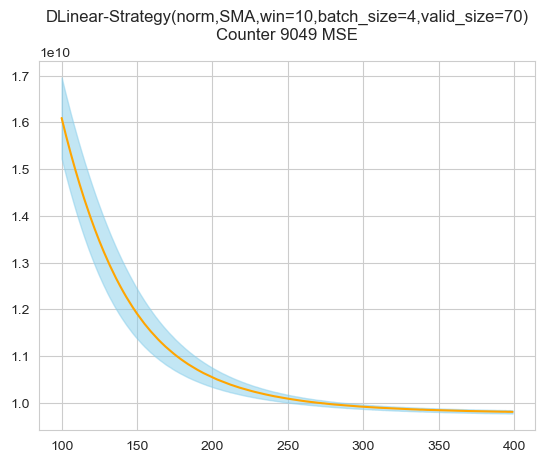

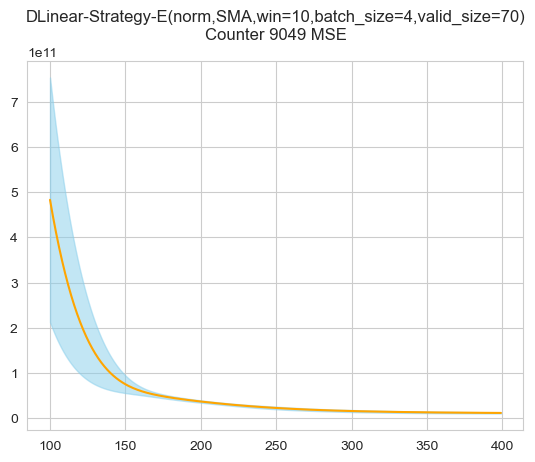

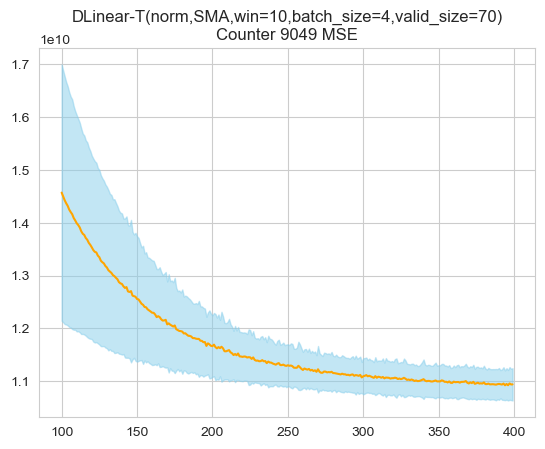

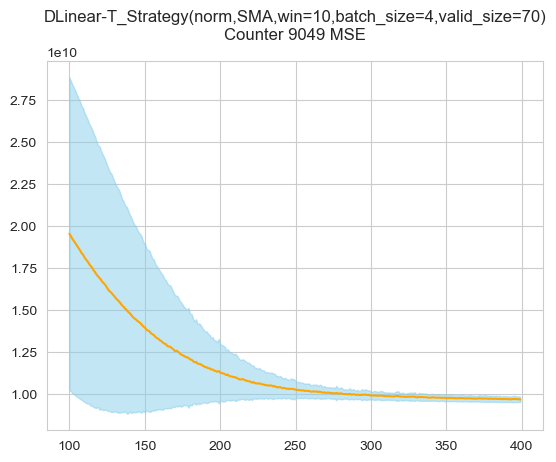

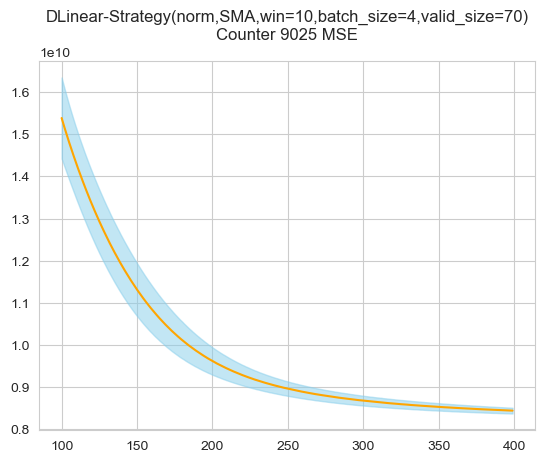

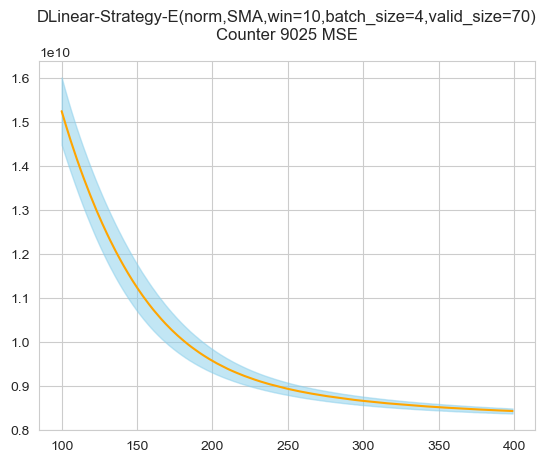

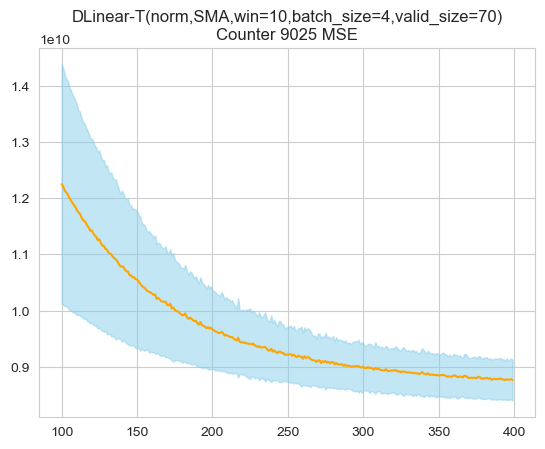

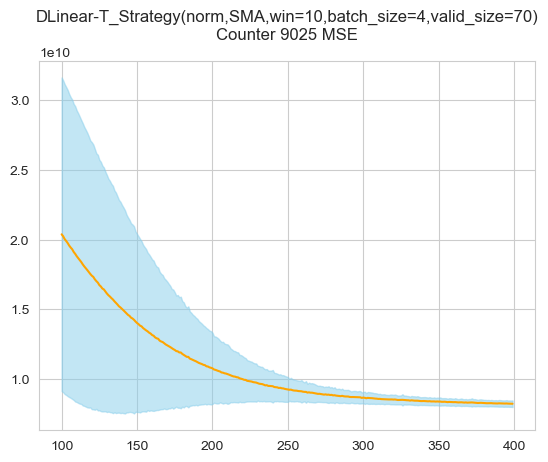

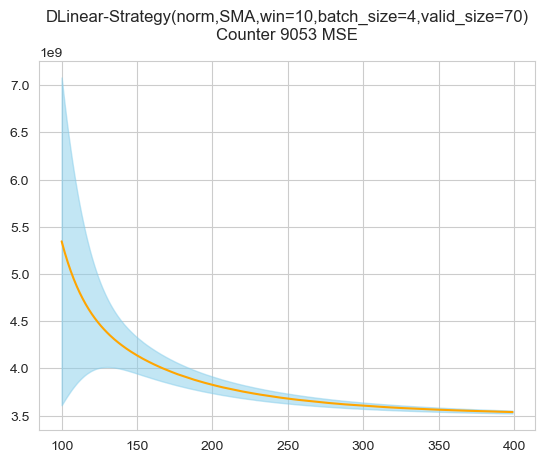

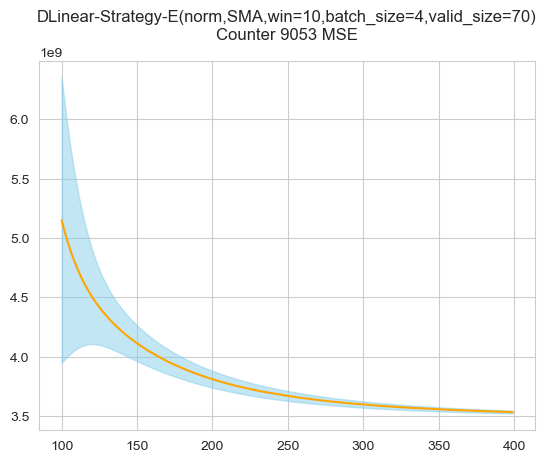

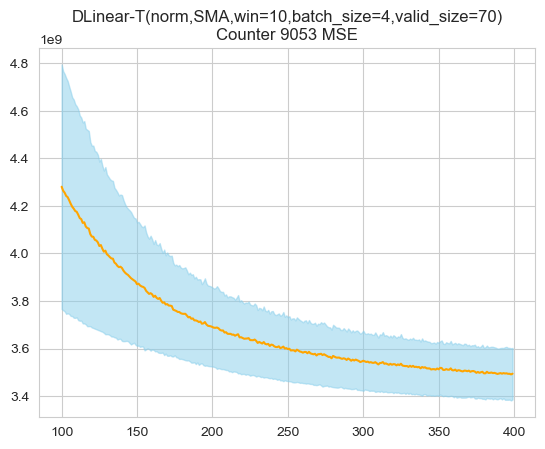

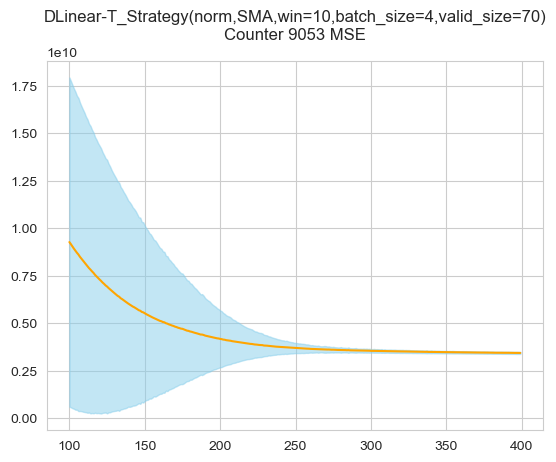

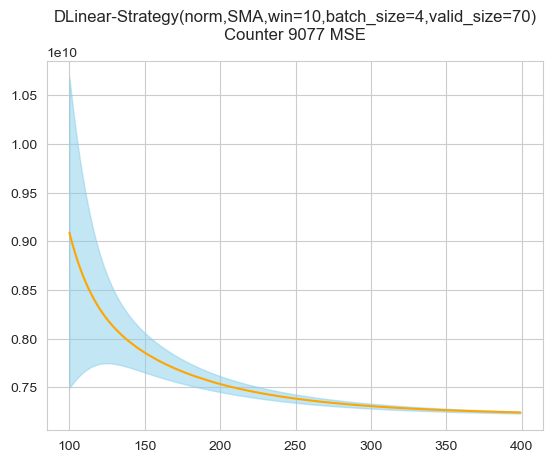

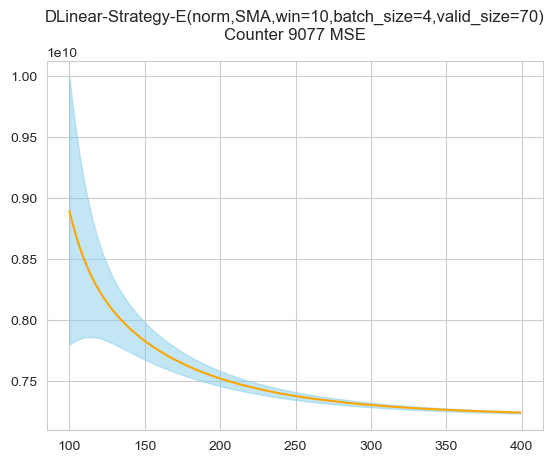

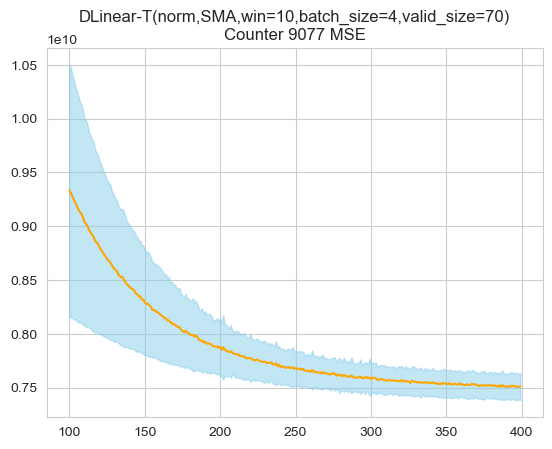

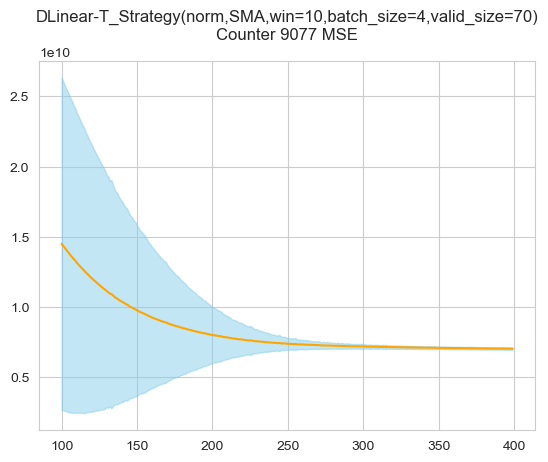

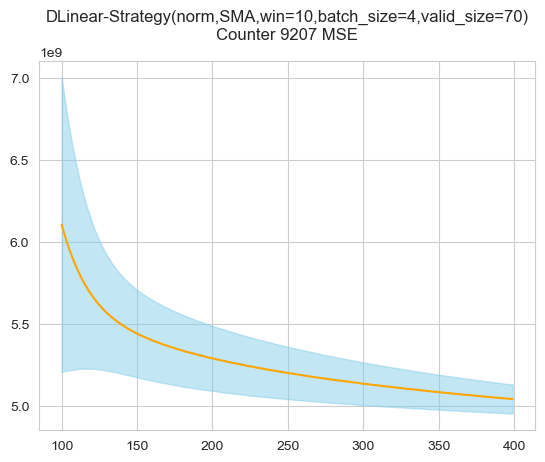

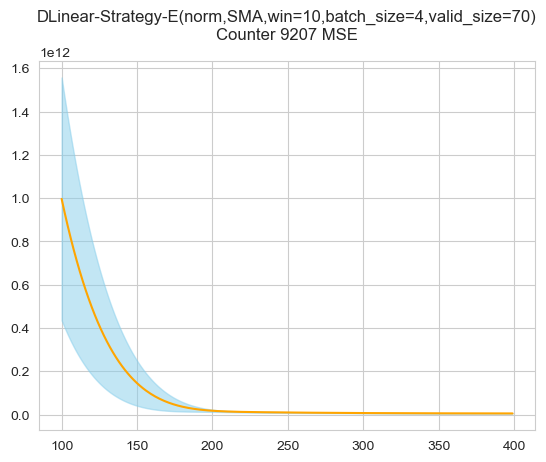

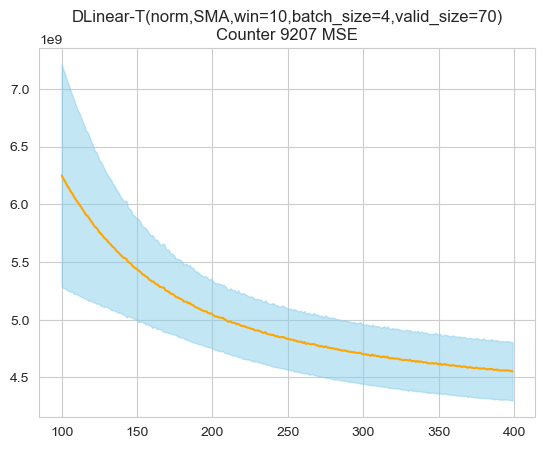

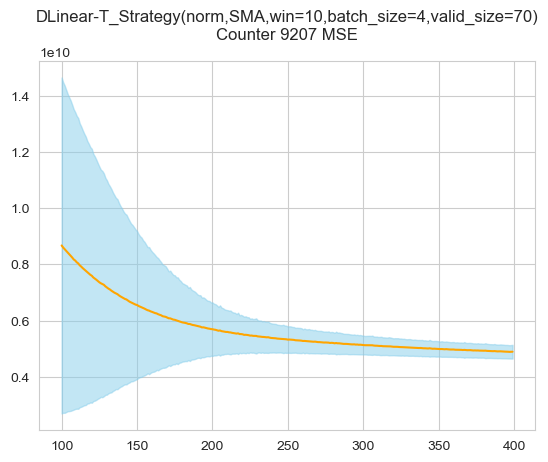

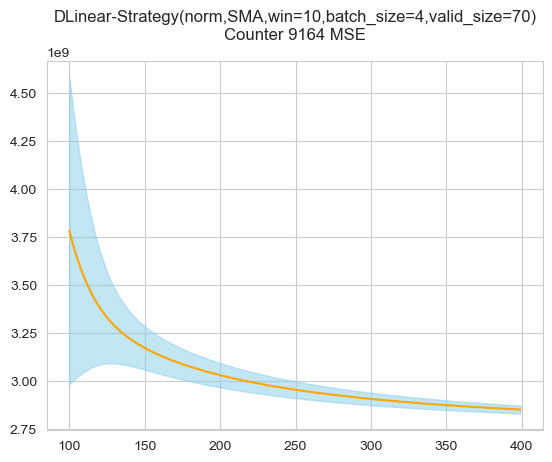

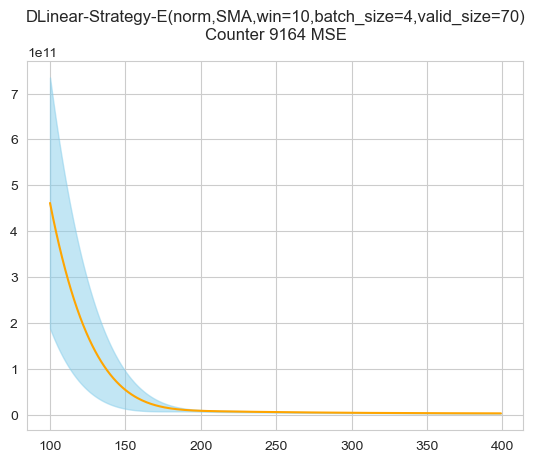

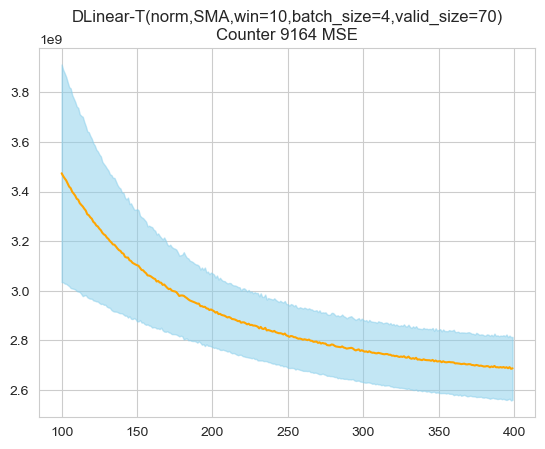

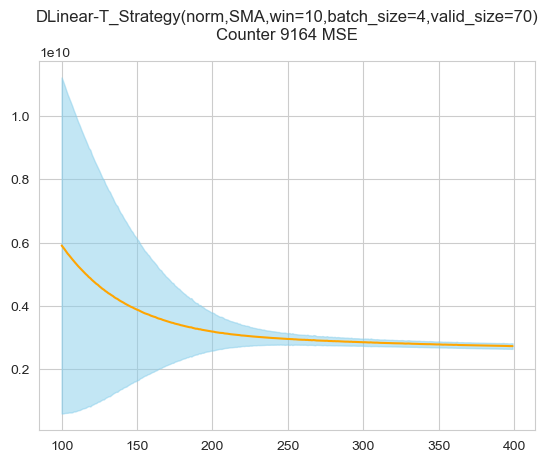

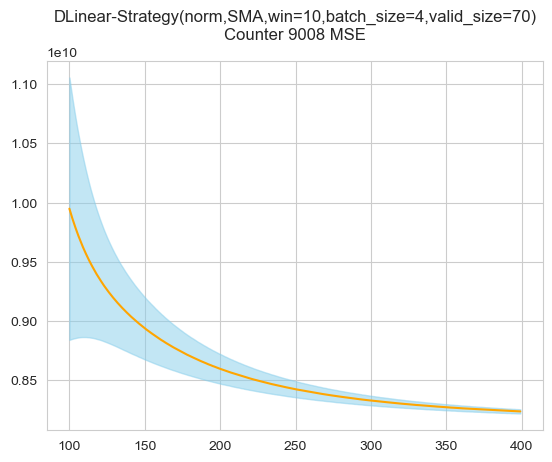

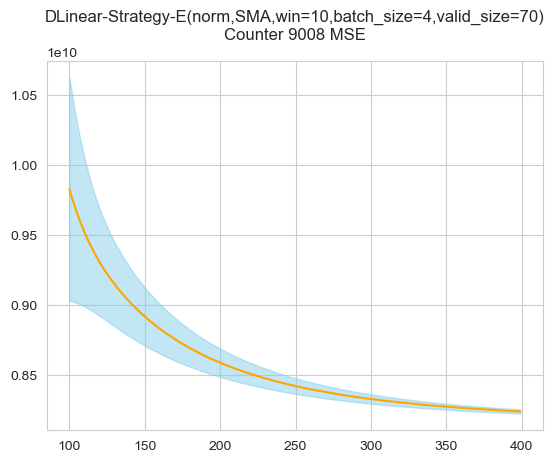

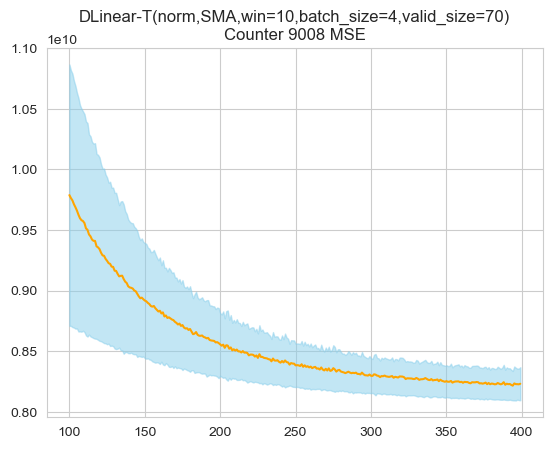

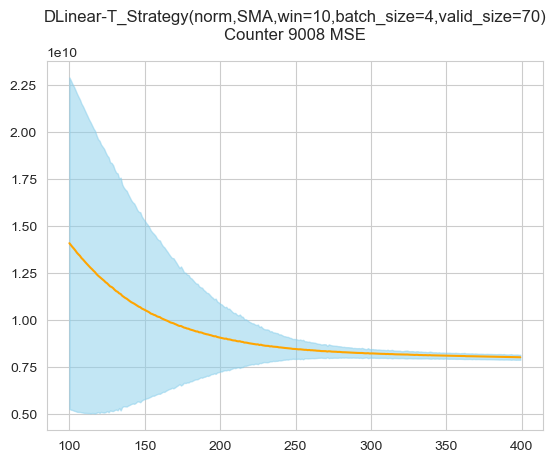

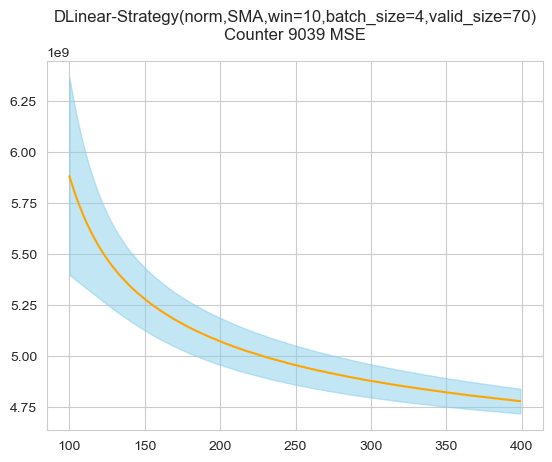

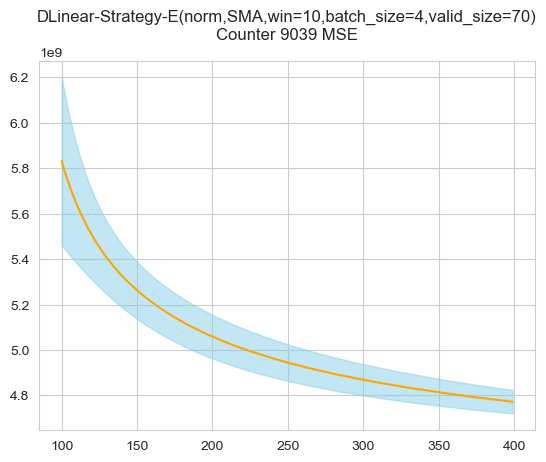

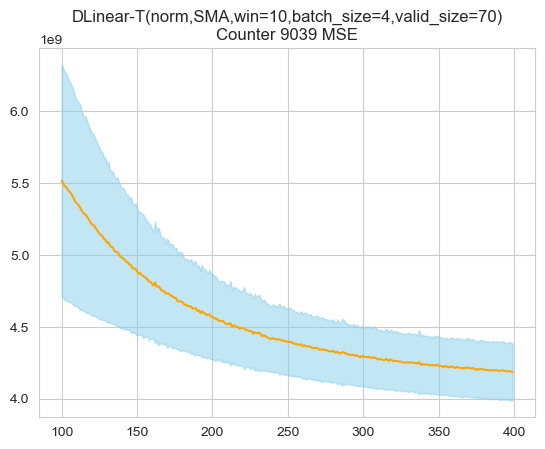

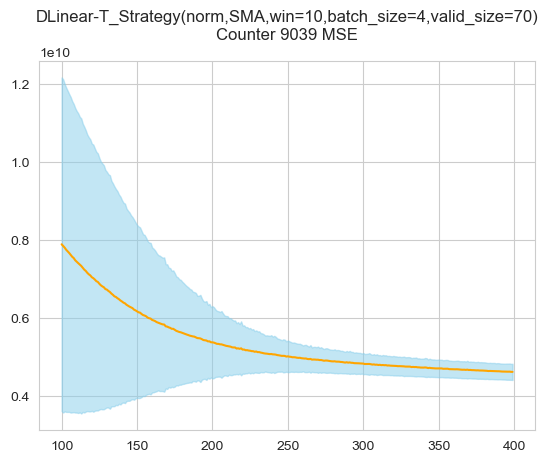

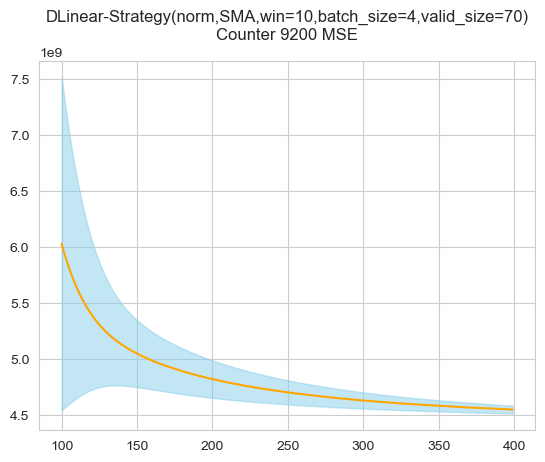

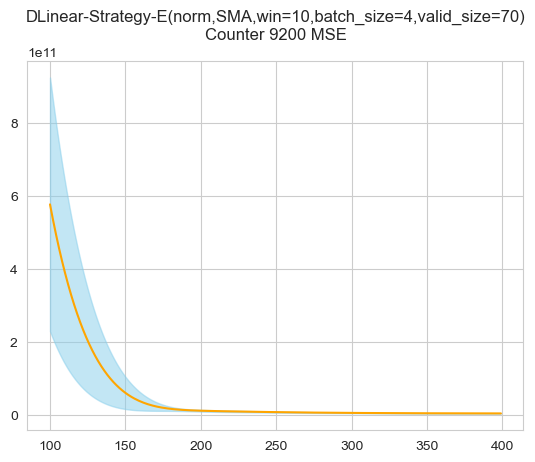

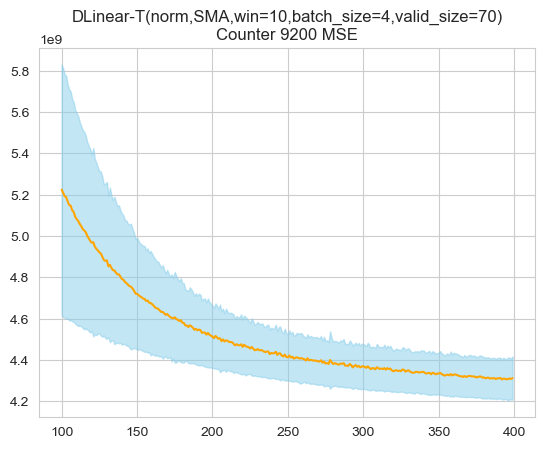

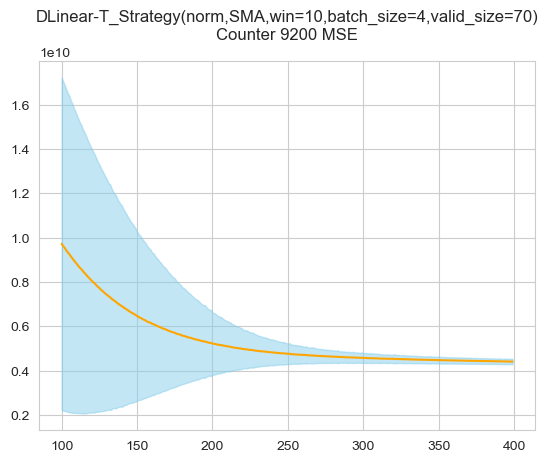

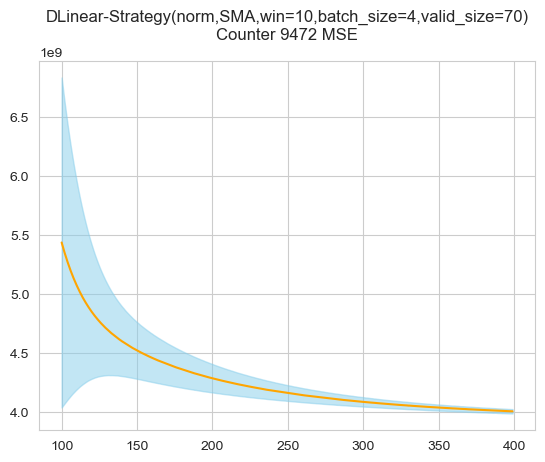

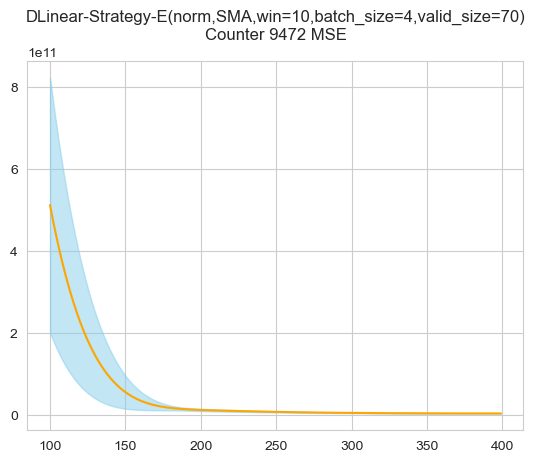

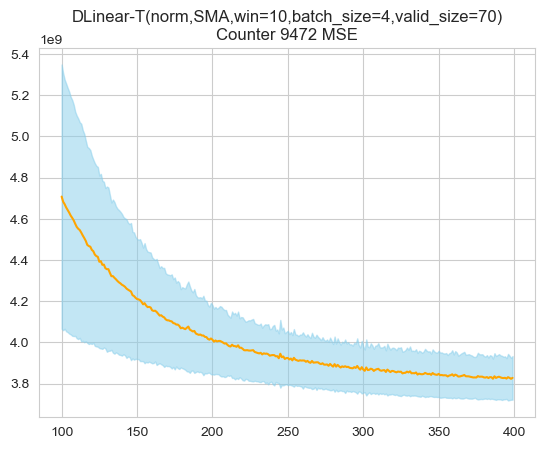

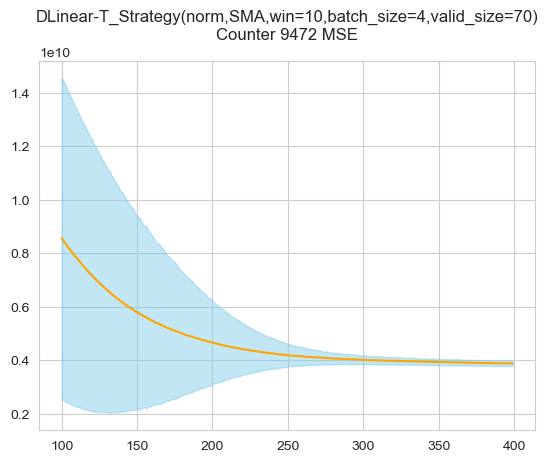

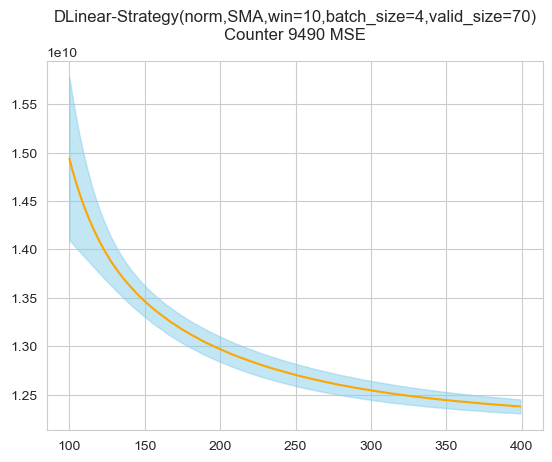

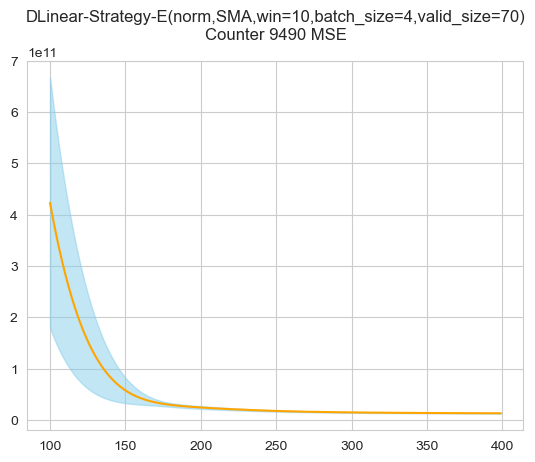

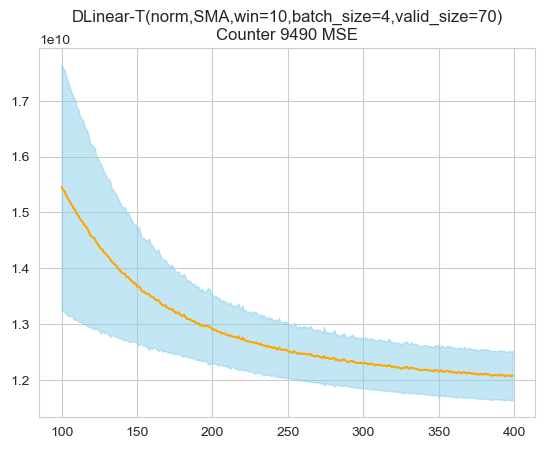

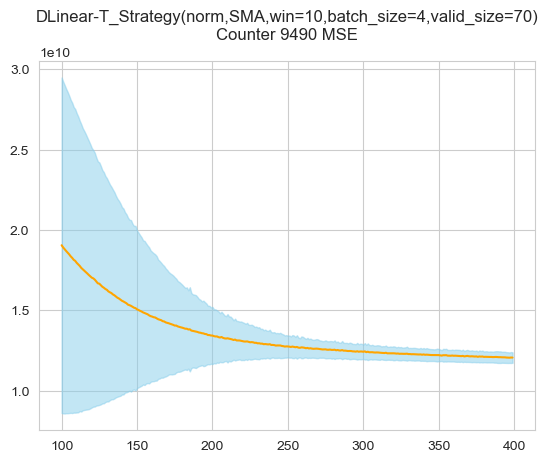

In [30]:
mse_among_counters = []  # (counter, model)
for counter_num in counter_nums:
    mse_among_models = []
    for d in model_save_dirs:
        mean, std = util.visualize_trains(
            d,
            counter_num,
            0,
            f'{d.split('/')[2]}\nCounter {counter_num} MSE',
            start=100,
            end=400,
            is_show=True
        )
        if pd.isna(mean[-1]):
            print(counter_num, d)
        mse_among_models.append(mean[-1])
    mse_among_counters.append(mse_among_models)

In [28]:
df = pd.DataFrame(mse_among_counters)  
df.idxmin(axis=1)

0     3
1     3
2     3
3     3
4     3
5     3
6     2
7     2
8     3
9     2
10    2
11    2
12    3
dtype: int64

In [29]:
df.to_clipboard()
df

,0,1,2,3
0,3.362698e+09,3.670815e+09,3.385723e+09,3.281070e+09
1,5.025382e+09,5.458403e+09,5.051751e+09,4.815769e+09
2,9.809595e+09,1.138602e+10,1.094209e+10,9.639115e+09
3,8.442348e+09,8.434330e+09,8.764717e+09,8.210672e+09
4,3.537749e+09,3.535520e+09,3.494126e+09,3.425265e+09
5,7.240751e+09,7.239370e+09,7.511740e+09,7.045686e+09
6,5.043260e+09,5.275269e+09,4.551918e+09,4.891227e+09
7,2.850795e+09,3.449119e+09,2.687828e+09,2.732488e+09
8,8.238979e+09,8.238121e+09,8.231816e+09,8.018706e+09
9,4.776698e+09,4.772586e+09,4.184967e+09,4.622847e+09


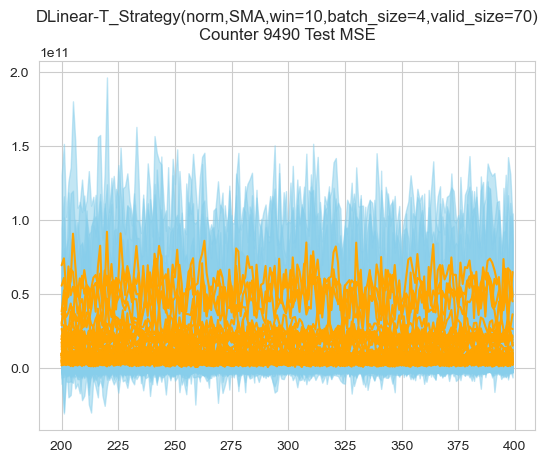

In [25]:
mse_among_counters1 = [] # (counter, model)
std_list1 = []  
for counter_num in counter_nums:
    mse_among_models = []
    std_among_models = []
    for d in model_save_dirs:
        mean, std = util.visualize_trains(
            d,
            counter_num,
            1,
            f'{d.split('/')[2]}\nCounter {counter_num} Test MSE',
            start=200,
            end=400,
            is_show=False
        )
        if pd.isna(mean[-1]):
            print(counter_num, d)
        mse_among_models.append(mean.mean())
        std_among_models.append(std.mean())
    mse_among_counters1.append(mse_among_models)
    std_list1.append(std_among_models)

In [20]:
df1 = pd.DataFrame(mse_among_counters1)  
df1.idxmin(axis=1)

0     2
1     0
2     3
3     1
4     0
5     2
6     2
7     2
8     0
9     0
10    2
11    0
12    2
dtype: int64

In [26]:
df1 = pd.DataFrame(std_list1)  
df1.idxmin(axis=1)

0     2
1     2
2     3
3     1
4     3
5     2
6     2
7     2
8     2
9     2
10    2
11    0
12    2
dtype: int64

In [21]:
df1.to_clipboard()
df1

,0,1,2,3
0,1.263495e+10,8.528686e+10,1.131352e+10,1.755025e+10
1,3.831238e+09,4.402762e+10,3.832583e+09,4.854878e+09
2,4.772832e+10,1.094101e+11,5.761682e+10,4.644273e+10
3,2.084345e+10,2.062095e+10,2.990063e+10,2.300997e+10
4,6.828718e+09,6.956197e+09,7.550535e+09,9.861155e+09
5,5.995298e+09,5.871843e+09,4.075080e+09,8.812587e+09
6,6.946388e+09,1.007737e+11,6.903525e+09,8.885949e+09
7,3.609390e+09,3.260073e+10,3.253246e+09,4.135048e+09
8,3.039948e+09,3.172234e+09,3.185687e+09,3.991321e+09
9,7.482576e+09,7.951536e+09,7.954734e+09,9.077174e+09


In [ ]:
mse_among_counters[0][0][1]

In [ ]:
mean, std = util.visualize_trains(
    d,
    counter_num,
    1,
    f'{d.split('/')[2]}\nCounter {counter_num} Train MSE',
    start=100,
    end=400,
    is_show=False
)

In [ ]:
mean[-1]

In [ ]:
mse_among_models

In [ ]:
df = pd.DataFrame(mse_among_counters)  
df.idxmin(axis=1)

In [ ]:
df.to_clipboard()
df

In [ ]:
np.sqrt(11522313490)

In [ ]:
counter_nums[10]

In [ ]:
counter_nums[2]

In [ ]:
util.visualize_trains(
        d,
        counter_num,
        1,
        'Test MSE',
        start=100,
        end=400,
        is_show=False
)

In [ ]:
df